In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# set seed
np.random.seed(2)

# read in data
df = pd.read_csv('cleaned_data.csv')

# list all column names without ...
pd.set_option('display.max_columns', None)
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (20,32,33,41,42,43,44,45,46,47,48,49,50,105,106,111) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Reporting Railroad Name,Report Year,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,Maintenance Accident Year,Maintenance Accident Month,Grade Crossing ID,Day,Date,Time,Accident Type,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,Subdivision,Division,Station,Milepost,State Abbreviation,County Name,District,Temperature,Visibility,Weather Condition,Track Type,Track Name,Track Class,Track Density,Train Direction,Equipment Type,Equipment Attended,Train Speed,Recorded Estimated Speed,Maximum Speed,Gross Tonnage,Signalization,Method of Operation,Adjunct Code 1,Adjunct Code Name 1,Adjunct Code 2,Adjunct Code Name 2,Adjunct Code 3,Adjunct Code Name 3,Remote Control Locomotive,First Car Number,First Car Position,First Car Loaded,Causing Car Initials,Causing Car Number,Causing Car Position,Causing Car Loaded,Positive Alcohol Tests,Positive Drug Tests,Passengers Transported,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Primary Accident Cause Code,Accident Cause Code,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Killed,Railroad Employees Injured,Passengers Killed,Passengers Injured,Others Killed,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Special Study 1,Special Study 2,Latitude,Longitude,Narrative,Joint Track Type,Joint Track Class,Class,Joint CD,Reporting Railroad Company Grouping,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,0.0,0.0,0.0,0.0,GEORGIA,NaN,MACON,242.00,GA,BIBB,3.0,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,6.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted Speed or Equivalent,NaN,NaN,NaN,NaN,Not a remotely controlled operation,150060,13.0,No,NaN,NaN,0.0,NaN,0.0,0.0,No,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36200.0,0.0,41720.0,H607,H607,1.0,0.0,1.0,0.0,6.0,40.0,6.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OTH,000-000-000,32.813658,-83.622785,WHILE PULLING NORTH THE GM42 FAILED TO COMPLY ...,Yard,1,CL,3.0,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Company,2016.0,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,16.0,4.0,NaN,9.0,04/09/2016,5:30 AM,Derailment,4.0,0.0,0.0,0.0,GEORGIA,NaN,MACON,242.00,GA,BIBB,3.0,60.0,Dawn,Clear,Yard,EAST PULLBACK,1,0000,North,Yard/switching,Yes,4.0,Estimated,6,0.0,Not Signaled,Other Than Main Track,K,Restricted 

In [137]:
initial_dat = df.loc[:,
        ['Reporting Railroad Name',
        'Report Year',
        'Other Railroad Name',
        'Maintenance Railroad Name',
        'Date',
        'Time',
        'Accident Type',
        'Persons Evacuated',
        'Temperature',
        'Visibility',
        'Weather Condition',
        'Track Type',
        'Track Class',
        'Track Density',
        'Equipment Type',
        'Equipment Attended',
        'Train Speed',
        'Recorded Estimated Speed',
        'Maximum Speed',
        'Gross Tonnage',
        'Signalization',
        'Method of Operation',
        'First Car Loaded',
        'Causing Car Loaded',
        'Positive Alcohol Tests',
        'Positive Drug Tests',
        'Passengers Transported',
        'Loaded Freight Cars',
        'Loaded Passenger Cars',
        'Derailed Loaded Freight Cars',
        'Derailed Loaded Passenger Cars',
        'Derailed Empty Freight Cars',
        'Derailed Empty Passenger Cars',
        'Total Damage Cost',
        'Primary Accident Cause Code',
        'Accident Cause Code',
        'Engineers On Duty',
        'Firemen On Duty',
        'Conductors On Duty',
        'Brakemen On Duty',
        'Total Persons Injured',
        'Latitude',
        'Longitude',
        'Others Injured',
        'Passengers Injured',
        'Railroad Employees Injured']]


# Drop all rows with NA in Report Year or Total Damage Cost
initial_dat = initial_dat.dropna(subset=['Report Year','Total Persons Injured','Railroad Employees Injured','Passengers Injured','Others Injured'])

# Convert Report Year to int
initial_dat['Year'] = initial_dat['Report Year'].astype(int)
initial_dat = initial_dat.drop('Report Year', axis=1)

# Convert Date to Datetime
initial_dat = initial_dat.dropna(subset=['Date'])
initial_dat['date'] = pd.to_datetime(initial_dat['Date'])
initial_dat = initial_dat.drop('Date',axis=1)

# new time features based on datetime var/index
initial_dat['dayofweek'] = initial_dat['date'].dt.dayofweek.astype(int)
initial_dat['month'] = initial_dat['date'].dt.month.astype(int)


## Looking at Total Deaths Over Groups

In [192]:
death_dat = df.loc[:,['Railroad Employees Killed','Passengers Killed','Others Killed','Total Persons Killed','Persons Killed For Reporting Railroad']]
death_dat = pd.concat([initial_dat['Year'],death_dat],axis=1)
death_dat['total_deaths'] = death_dat['Railroad Employees Killed']+death_dat['Passengers Killed']+death_dat['Others Killed']+death_dat['Persons Killed For Reporting Railroad']
death_dat[death_dat['Total Persons Killed']>0].head()
death_dat[death_dat['Total Persons Killed']!=death_dat['total_deaths']]

,Year,Railroad Employees Killed,Passengers Killed,Others Killed,Total Persons Killed,Persons Killed For Reporting Railroad,total_deaths
121,2016.0,0.0,0.0,1.0,1.0,1.0,2.0
161,2014.0,0.0,0.0,1.0,1.0,1.0,2.0
185,2022.0,0.0,0.0,1.0,1.0,1.0,2.0
198,2022.0,0.0,0.0,1.0,1.0,1.0,2.0
199,2022.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
215986,2005.0,2.0,0.0,0.0,4.0,0.0,2.0
215987,2005.0,2.0,0.0,0.0,4.0,4.0,6.0
216009,2005.0,0.0,0.0,1.0,1.0,1.0,2.0
216019,2006.0,0.0,0.0,1.0,1.0,1.0,2.0


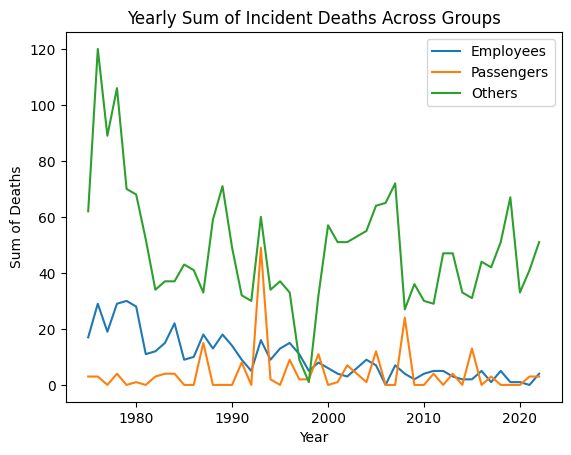

In [196]:
emp_killed = death_dat.groupby('Year')['Railroad Employees Killed'].sum().reset_index()
pass_killed = death_dat.groupby('Year')['Passengers Killed'].sum().reset_index()
other_killed = death_dat.groupby('Year')['Others Killed'].sum().reset_index()
tot_killed = death_dat.groupby('Year')['Total Persons Killed'].sum().reset_index()
plt.plot('Year','Railroad Employees Killed',data=emp_killed,label='Employees')
plt.plot('Year','Passengers Killed',data=pass_killed,label='Passengers')
plt.plot('Year','Others Killed',data=other_killed,label='Others')
#plt.plot('Year','Total Persons Killed',data=tot_killed,label='Total')
plt.xlabel('Year')
plt.ylabel('Sum of Deaths')
plt.title('Yearly Sum of Incident Deaths Across Groups')
plt.legend()
plt.savefig('images/sum-yearly-deaths.png')
plt.show()

## Examine Counts/Proportion of Injuries Amongst People

In [79]:
employee_props = initial_dat.groupby('Year')['Railroad Employees Injured'].sum()/initial_dat.groupby('Year')['Total Persons Injured'].sum()
passenger_props = initial_dat.groupby('Year')['Passengers Injured'].sum()/initial_dat.groupby('Year')['Total Persons Injured'].sum()
other_props = initial_dat.groupby('Year')['Others Injured'].sum()/initial_dat.groupby('Year')['Total Persons Injured'].sum()

injury_props = pd.DataFrame({'employee':employee_props, 'passenger':passenger_props, 'other':other_props})
injury_props.head()

,employee,passenger,other
Year,,,
1975,0.197301,0.308050,0.059097
1976,0.315979,0.239691,0.103608
1977,0.485597,0.052126,0.137860
1978,0.234995,0.267069,0.104795
1979,0.305161,0.163348,0.049573


<function matplotlib.pyplot.show(close=None, block=None)>

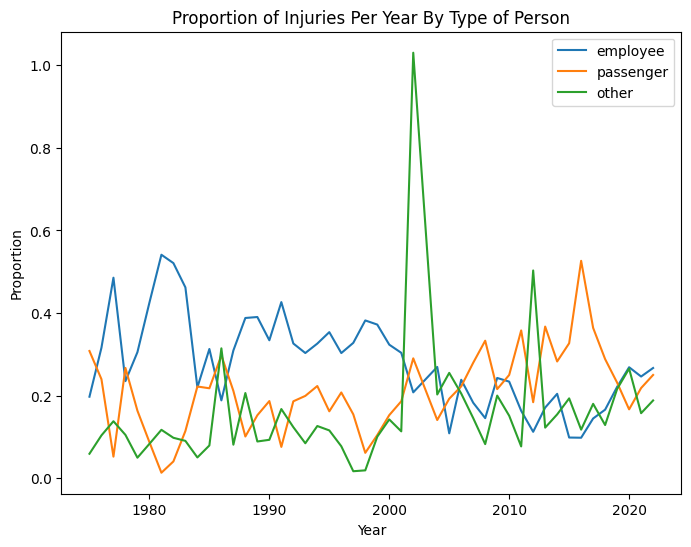

In [80]:
plt.figure(figsize=(8,6))
plt.plot(injury_props['employee'], label='employee')
plt.plot(injury_props['passenger'], label='passenger')
plt.plot(injury_props['other'], label='other')
plt.title('Proportion of Injuries Per Year By Type of Person')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.savefig("images/prop-yrly-inj-type.png")
plt.show

In [121]:
employee_counts = initial_dat.groupby('Year')['Railroad Employees Injured'].sum()
passenger_counts = initial_dat.groupby('Year')['Passengers Injured'].sum()
other_counts = initial_dat.groupby('Year')['Others Injured'].sum()

injury_counts = pd.DataFrame({'employee':employee_counts, 'passenger':passenger_counts, 'other':other_counts})
#injury_counts[injury_counts.index>2000]


In [195]:
other_counts.sort_values(ascending=False)

Year
2002    1076.0
2012     484.0
2005     444.0
1986     439.0
1978     330.0
2015     275.0
1977     201.0
1976     201.0
1988     186.0
2004     167.0
2006     141.0
2017     137.0
2007     129.0
1975     127.0
1979     122.0
1980     120.0
1991     115.0
2013     106.0
2016     102.0
1981      98.0
2000      95.0
1990      94.0
1984      91.0
2009      89.0
1994      86.0
1995      85.0
1985      84.0
2001      84.0
2019      84.0
2018      83.0
1987      82.0
1989      81.0
2020      78.0
2008      76.0
1992      75.0
2010      75.0
2011      73.0
1993      70.0
1982      70.0
1983      68.0
2022      67.0
2014      65.0
2021      62.0
1996      51.0
1999      51.0
1997       9.0
1998       8.0
Name: Others Injured, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

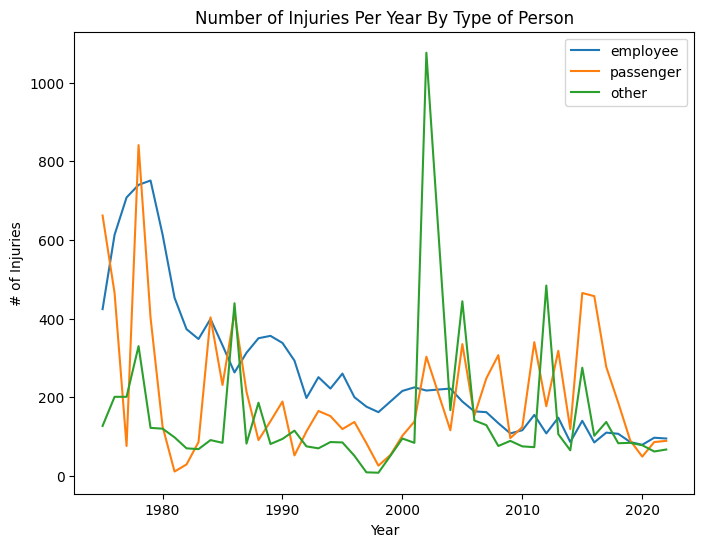

In [122]:
plt.figure(figsize=(8,6))
plt.plot(injury_counts['employee'], label='employee')
plt.plot(injury_counts['passenger'], label='passenger')
plt.plot(injury_counts['other'], label='other')
plt.title('Number of Injuries Per Year By Type of Person')
plt.xlabel('Year')
plt.ylabel('# of Injuries')
plt.legend()
plt.savefig("images/yrly-inj-type.png")
plt.show

## Looking Specifically At Employee Injuries

In [138]:
initial_dat['Track Class'] = np.where(initial_dat['Track Class'] == 1.0, 1, 0)
initial_dat['Positive Alcohol Tests'].isna().sum()

139647

##### cutting down dataset to examine reduced number of/specific features in relation to employee injuries

In [146]:
#removing the year 2003 due to errors
initial_dat.drop(initial_dat[initial_dat['Year'] == 2003].index, inplace = True)

initial_dat.drop(initial_dat[initial_dat['Equipment Attended'] == '7'].index, inplace = True)
initial_dat.drop(initial_dat[initial_dat['Equipment Attended'] == '0'].index, inplace = True)
initial_dat[initial_dat['Equipment Attended']=='7']
initial_dat['Equipment Attended'].value_counts()

cat_features = initial_dat[initial_dat['Year']>1999].loc[:,
        ['Reporting Railroad Name',
        'Accident Type',
        'Equipment Type',
        'Equipment Attended',
        'Method of Operation',
        'Passengers Transported',
        'Primary Accident Cause Code',
        'Accident Cause Code']]

num_features = df[df['Report Year']>1999].select_dtypes(include=['float64', 'int64'])
num_features.drop(num_features[num_features['Report Year'] == 2003].index, inplace = True)
num_features = num_features.drop(['Accident Year',
                   'Accident Month',
                   'Other Accident Year',
                   'Other Accident Month',
                   'Day',
                   'Maintenance Accident Year',
                   'Maintenance Accident Month',
                   'Railroad Employees Killed',
                   'Passengers Killed',
                   'Passengers Injured',
                   'Others Killed',
                   'Others Injured',
                   'Total Persons Killed',
                   'Total Persons Injured',
                   'Total Killed Form 54',
                   'Total Injured Form 54',
                   'Persons Killed For Reporting Railroad',
                   'Persons Injured For Reporting Railroad'], axis=1)

combined_dat = pd.concat([cat_features,num_features],axis=1)

combined_dat.shape

(67128, 58)

##### removing cols with >1000 na's and replacing the other NAs with mean values

In [100]:
# find all rows that have na, order by most na to least
# drop all columns with more than 10000 na
na_counts = combined_dat.isna().sum()
cols_to_drop = na_counts[na_counts > 1000].index.tolist()

test_dat = combined_dat.copy()
# drop columns with more than 1000 missing values
test_dat.drop(cols_to_drop, axis=1, inplace=True)

# fill in the rest of the na with the mean of the column
test_dat.fillna(df.mean(), inplace=True)

print(test_dat.isna().sum().sort_values(ascending=False))

# find length of df
len(test_dat)

test_dat.columns

Joint CD                                  0
Gross Tonnage                             0
Rear End Remote Locomotives               0
Rear End Manual Locomotives               0
Mid Train Remote Locomotives              0
Mid Train Manual Locomotives              0
Head End Locomotives                      0
Causing Car Position                      0
First Car Position                        0
Maximum Speed                             0
Derailed Mid Train Manual Locomotives     0
Train Speed                               0
Temperature                               0
District                                  0
Persons Evacuated                         0
Hazmat Released Cars                      0
Hazmat Cars Damaged                       0
Hazmat Cars                               0
Derailed Head End Locomotives             0
Derailed Mid Train Remote Locomotives     0
Persons Injured For Reporting Railroad    0
Derailed Empty Freight Cars               0
Persons Killed For Reporting Rai

Index(['Report Year', 'Hazmat Cars', 'Hazmat Cars Damaged',
       'Hazmat Released Cars', 'Persons Evacuated', 'District', 'Temperature',
       'Train Speed', 'Maximum Speed', 'Gross Tonnage', 'First Car Position',
       'Causing Car Position', 'Head End Locomotives',
       'Mid Train Manual Locomotives', 'Mid Train Remote Locomotives',
       'Rear End Manual Locomotives', 'Rear End Remote Locomotives',
       'Derailed Head End Locomotives',
       'Derailed Mid Train Manual Locomotives',
       'Derailed Mid Train Remote Locomotives',
       'Derailed Rear End Manual Locomotives',
       'Derailed Rear End Remote Locomotives', 'Loaded Freight Cars',
       'Loaded Passenger Cars', 'Empty Freight Cars', 'Empty Passenger Cars',
       'Cabooses', 'Derailed Loaded Freight Cars',
       'Derailed Loaded Passenger Cars', 'Derailed Empty Freight Cars',
       'Derailed Empty Passenger Cars', 'Derailed Cabooses',
       'Equipment Damage Cost', 'Track Damage Cost', 'Total Damage Cost',

#### Preprocessing for Modeling

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import make_column_selector as selector

def before_preprocess(data):
    num_data = data.select_dtypes(include=['float64', 'int64'])
    cat_data = data.select_dtypes(include=['object'])
    cat_data.fillna('NA', inplace=True)
    cat_data = cat_data.astype(str)
    new_dat = pd.concat([num_data,cat_data], axis=1)
    return new_dat

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)
'''categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)'''

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), selector(dtype_include=object)),
    ]
)

encoder = OneHotEncoder()
encoded = encoder.fit_transform(cat_features)
encoder.get_feature_names_out()
imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit_transform(num_features)
imputer.feature_names_in_

#pre_dat = preprocessor(combined_dat, test_size = .25)
#pre_dat['cat'].get_column_names_out()

#from sklearn.model_selection import train_test_split
#train, test = train_test_split()



array(['Report Year', 'Hazmat Cars', 'Hazmat Cars Damaged',
       'Hazmat Released Cars', 'Persons Evacuated', 'District',
       'Temperature', 'Train Speed', 'Maximum Speed', 'Gross Tonnage',
       'First Car Position', 'Causing Car Number', 'Causing Car Position',
       'Positive Alcohol Tests', 'Positive Drug Tests',
       'Head End Locomotives', 'Mid Train Manual Locomotives',
       'Mid Train Remote Locomotives', 'Rear End Manual Locomotives',
       'Rear End Remote Locomotives', 'Derailed Head End Locomotives',
       'Derailed Mid Train Manual Locomotives',
       'Derailed Mid Train Remote Locomotives',
       'Derailed Rear End Manual Locomotives',
       'Derailed Rear End Remote Locomotives', 'Loaded Freight Cars',
       'Loaded Passenger Cars', 'Empty Freight Cars',
       'Empty Passenger Cars', 'Cabooses', 'Derailed Loaded Freight Cars',
       'Derailed Loaded Passenger Cars', 'Derailed Empty Freight Cars',
       'Derailed Empty Passenger Cars', 'Derailed Caboos

In [54]:
cat = pd.DataFrame.sparse.from_spmatrix(encoded, columns=encoder.get_feature_names_out())
cat

Reporting Railroad Name_ALABAMA RAILROAD  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
67123                                       0.0   
67124                                       0.0   
67125                                       0.0   
67126                                       0.0   
67127                                       0.0   

       Reporting Railroad Name_AN Railway LLC  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
67123                                     0.0   
67124                                     0.0   
67125                                     0.0   
67126                                     0.0   
67127                                     0.0   

       Reporting Railroad Name_ARIZONA CENTRAL RAILROAD, INC.  \
0                                                    0.0        
1                                                    0.0        
2                                                    0.0        
3                                                    0.0        
4                                                    0.0        
...                                                  ...        
67123                                                0.0        
67124                                                0.0        
67125                                                0.0        
67126                                                0.0        
67127                                                0.0        

       Reporting Railroad Name_ARKANSAS MIDLAND RAILROAD COMPANY, INC.  \
0                                                    0.0                 
1                                                    0.0                 
2                                                    0.0                 
3                                                    0.0                 
4                                                    0.0                 
...                                                  ...                 
67123                                                0.0                 
67124                                                0.0                 
67125                                                0.0                 
67126                                                0.0                 
67127                                                0.0                 

       Reporting Railroad Name_ASHLAND RAILWAY INC.  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
67123                                           0.0   
67124                                           0.0   
67125                                           0.0   
67126                                           0.0   
67127                                           0.0   

       Reporting Railroad Name_AUBURN FERTILIZER  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
67123                                        0.0   
67124                                        0.0   
67125 

In [55]:
num = pd.DataFrame(imputed, columns=imputer.feature_names_in_)
num

,Report Year,Hazmat Cars,Hazmat Cars Damaged,Hazmat Released Cars,Persons Evacuated,District,Temperature,Train Speed,Maximum Speed,Gross Tonnage,First Car Position,Causing Car Number,Causing Car Position,Positive Alcohol Tests,Positive Drug Tests,Head End Locomotives,Mid Train Manual Locomotives,Mid Train Remote Locomotives,Rear End Manual Locomotives,Rear End Remote Locomotives,Derailed Head End Locomotives,Derailed Mid Train Manual Locomotives,Derailed Mid Train Remote Locomotives,Derailed Rear End Manual Locomotives,Derailed Rear End Remote Locomotives,Loaded Freight Cars,Loaded Passenger Cars,Empty Freight Cars,Empty Passenger Cars,Cabooses,Derailed Loaded Freight Cars,Derailed Loaded Passenger Cars,Derailed Empty Freight Cars,Derailed Empty Passenger Cars,Derailed Cabooses,Equipment Damage Cost,Track Damage Cost,Total Damage Cost,Engineers On Duty,Firemen On Duty,Conductors On Duty,Brakemen On Duty,Hours Engineers On Duty,Minutes Engineers On Duty,Hours Conductors On Duty,Minutes Conductors On Duty,Railroad Employees Injured,Latitude,Longitude,Joint CD
0,2016.0,0.0,0.0,0.0,0.0,3.0,60.0,6.0,6.0,0.0,13.0,217021.01908,0.0,0.000000,0.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36200.0,0.0,41720.0,1.0,0.0,1.0,0.0,6.000000,40.00000,6.000000,40.000000,0.0,32.813658,-83.622785,3.0
1,2016.0,4.0,0.0,0.0,0.0,3.0,60.0,4.0,6.0,0.0,1.0,217021.01908,0.0,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000.0,1520.0,41720.0,1.0,0.0,1.0,0.0,7.000000,40.00000,7.000000,40.000000,0.0,32.813658,-83.622785,1.0
2,2016.0,0.0,0.0,0.0,0.0,3.0,65.0,0.0,1.0,1200.0,4.0,217021.01908,0.0,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1320.0,0.0,30929.0,0.0,0.0,1.0,0.0,5.073374,29.78205,5.000000,1.000000,0.0,33.899959,-84.285001,3.0
3,2016.0,0.0,0.0,0.0,0.0,3.0,65.0,1.0,1.0,4564.0,51.0,217021.01908,0.0,0.000000,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29609.0,0.0,30929.0,0.0,0.0,0.0,0.0,5.073374,29.78205,5.127141,29.843877,0.0,33.899959,-84.285001,1.0
4,2018.0,0.0,0.0,0.0,0.0,3.0,30.0,3.0,3.0,0.0,1.0,217021.01908,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17000.0,0.0,17000.0,1.0,0.0,0.0,0.0,1.000000,15.00000,5.127141,29.843877,0.0,34.083929,-83.565254,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71104,2005.0,0.0,0.0,0.0,0.0,4.0,28.0,25.0,25.0,2460.0,5.0,217021.01908,0.0,0.002345,0.013213,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,300000.0,70000.0,370000.0,1.0,0.0,0.0,0.0,10.000000,15.00000,5.127141,29.843877,0.0,0.000000,0.000000,1.0
71105,2005.0,0.0,0.0,0.0,0.0,2.0,30.0,7.0,7.0,0.0,9.0,217021.01908,0.0,0.002345,0.013213,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,20000.0,15000.0,35000.0,1.0,0.0,1.0,0.0,9.000000,5.00000,9.000000,5.000000,0.0,0.000000,0.000000,1.0
71106,2005.0,0.0,0.0,0.0,0.0,2.0,20.0,24.0,24.0,0.0,17.0,217021.01908,0.0,0.002345,0.013213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,20000.0,20000.0,40000.0,1.0,0.0,1.0,0.0,7.000000,55.00000,7.000000,55.000000,0.0,0.000000,0.000000,1.0
71107,2005.0,0.0,0.0,0.0,0.0,2.0,27.0,7.0,7.0,0.0,7.0,217021.01908,0.0,0.002345,0.013213,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,9000.0,6000.0,15000.0,1.0,0.0,1.0,0.0,10.000000,29.78205,10.000000,29.843877,0.0,0.000000,0.000000,1.0


In [56]:
model_dat = pd.concat([num,cat],axis=1)
#na_counts = model_dat.isna().sum()
#na_counts[na_counts > 1000].index.tolist()
model_dat.fillna(0, inplace=True)

X = model_dat.drop('Railroad Employees Injured',axis=1)
y = model_dat['Railroad Employees Injured']



In [57]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)

print("X-train shape: ", xtrain.shape)
print("Y-train shape: ", ytrain.shape)
print("X-test shape: ", xtest.shape)
print("Y-test shape: ", ytest.shape)

X-train shape:  (56887, 1484)
Y-train shape:  (56887,)
X-test shape:  (14222, 1484)
Y-test shape:  (14222,)


### Gradient Booster

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(verbose=True,
                                  validation_fraction=0.2,
                                  n_iter_no_change=5,
                                  tol=0.05,
                                  random_state=0)

gbreg.fit(xtrain,ytrain)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


      Iter       Train Loss   Remaining Time 
         1           0.1415           11.34m
         2           0.1327            9.12m
         3           0.1256            8.30m
         4           0.1197            7.80m
         5           0.1141            7.45m
         6           0.1096            7.83m


GradientBoostingRegressor(n_iter_no_change=5, random_state=0, tol=0.05,
                          validation_fraction=0.2, verbose=True)

In [182]:
print('Test Score:',gbreg.score(xtest,ytest))
print('Train Score:',gbreg.score(xtrain,ytrain))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Test Score: 0.08527996212561517


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Train Score: 0.2451587792348795


In [184]:
importances = gbreg.feature_importances_
colnames = X.columns

std = np.std([tree[0].feature_importances_ for tree in gbreg.estimators_], axis=0)
gb_importances = pd.DataFrame({'importances':importances,'std':std}, index=colnames)
gb_importances.sort_values('importances',ascending=False)

,importances,std
Derailed Loaded Passenger Cars,0.510326,0.067126
Equipment Damage Cost,0.179501,0.111548
Loaded Passenger Cars,0.064152,0.052976
Track Damage Cost,0.055308,0.047028
Total Damage Cost,0.055108,0.084638
...,...,...
Reporting Railroad Name_Port Of Manatee,0.000000,0.000000
"Reporting Railroad Name_Port Harbor Railroad, Inc.",0.000000,0.000000
Reporting Railroad Name_Port Bienville Railroad,0.000000,0.000000
Reporting Railroad Name_Port Authority Trans Hudson,0.000000,0.000000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


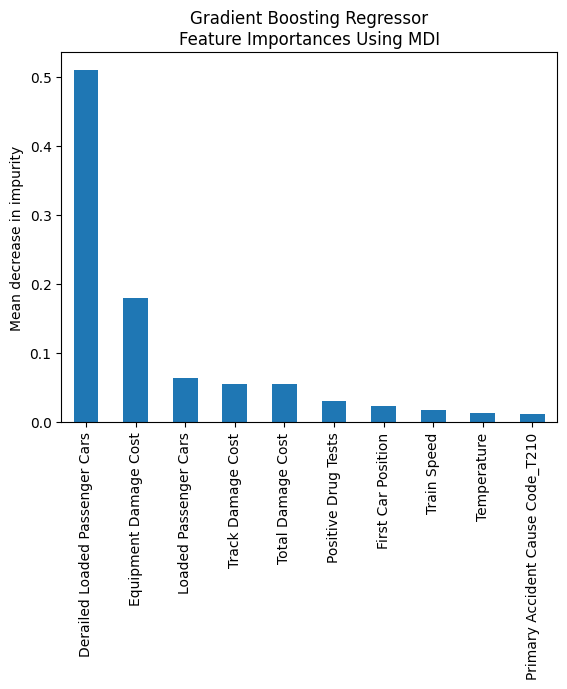

In [188]:
top_10_gb = gb_importances.sort_values('importances',ascending=False).iloc[0:10,0]
std_gb = gb_importances.sort_values('importances',ascending=False).iloc[0:10,1]
fig, ax = plt.subplots()
top_10_gb.plot.bar(ax=ax)
ax.set_title("Gradient Boosting Regressor\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# turn conf matrix in df for visualization
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

print("max features = sqrt")
rfreg = RandomForestRegressor(max_features='sqrt',
                                verbose=True,
                                n_jobs=-1,
                                random_state=0)

rfreg.fit(xtrain, ytrain)


max features = sqrt


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.7s finished


RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=0,
                      verbose=True)

In [64]:
print('Test Score:',rfreg.score(xtest,ytest))
print('Train Score:',rfreg.score(xtrain,ytrain))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Test Score: 0.2723874074378745


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s


Train Score: 0.9000208104702815


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


#### Feature Importances (max_feat = sqrt(# of predictors))

In [65]:
importances = rfreg.feature_importances_
colnames = X.columns

std = np.std([tree.feature_importances_ for tree in rfreg.estimators_], axis=0)
forest_importances = pd.DataFrame({'importances':importances,'std':std}, index=colnames)
forest_importances.sort_values('importances',ascending=False)

,importances,std
Equipment Damage Cost,0.079073,0.056965
Total Damage Cost,0.064095,0.038609
Derailed Loaded Passenger Cars,0.058429,0.061222
Train Speed,0.036711,0.021573
Maximum Speed,0.036196,0.021895
...,...,...
Primary Accident Cause Code_E19C,0.000000,0.000000
"Reporting Railroad Name_LUXAPALILA VALLEY RAILROAD, INC.",0.000000,0.000000
Primary Accident Cause Code_E31L,0.000000,0.000000
Primary Accident Cause Code_E33L,0.000000,0.000000


Top 10 Features

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


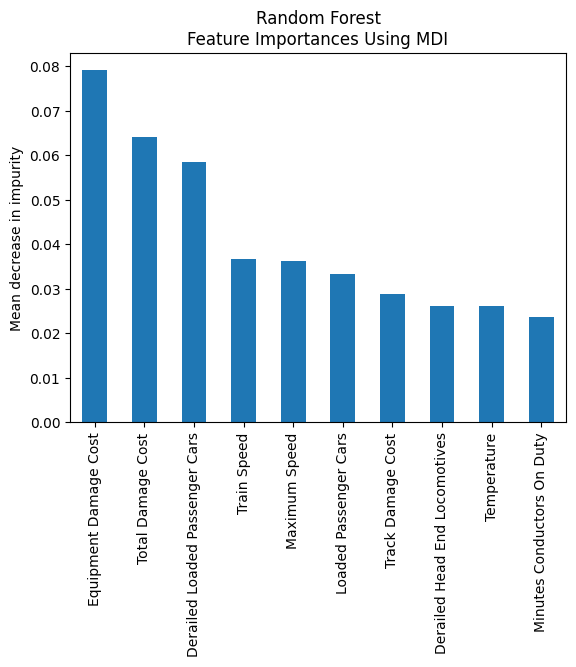

In [66]:
top_10 = forest_importances.sort_values('importances',ascending=False).iloc[0:10,0]
std = forest_importances.sort_values('importances',ascending=False).iloc[0:10,1]
fig, ax = plt.subplots()
top_10.plot.bar(ax=ax)
ax.set_title("Random Forest\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

Top 20 Features

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


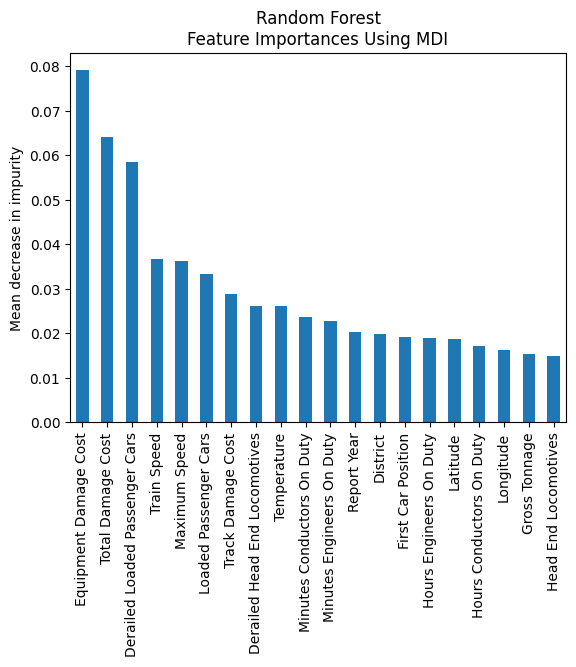

In [128]:
top_20 = forest_importances.sort_values('importances',ascending=False).iloc[0:20,0]
std = forest_importances.sort_values('importances',ascending=False).iloc[0:20,1]
fig, ax = plt.subplots()
top_20.plot.bar(ax=ax)
ax.set_title("Random Forest\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

In [68]:
print("max features = full set of predictors")
rfreg_more_feat = RandomForestRegressor(max_features=int(len(X.columns)/2),
                              verbose=True,
                                n_jobs=-1)

rfreg_more_feat.fit(xtrain, ytrain)

print('Test Score:',rfreg_more_feat.score(xtest,ytest))
print('Train Score:',rfreg_more_feat.score(xtrain,ytrain))

max features = full set of predictors


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.8min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/p

Test Score: 0.32573406151099416


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


Train Score: 0.9063705313169421


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


#### Feature Importances (max_feat = # of predicitors)

In [69]:
importances2 = rfreg_more_feat.feature_importances_
colnames = X.columns

std2 = np.std([tree.feature_importances_ for tree in rfreg_more_feat.estimators_], axis=0)
forest_importances2 = pd.DataFrame({'importances':importances2,'std':std}, index=colnames)
forest_importances2.sort_values('importances',ascending=False)


,importances,std
Derailed Loaded Passenger Cars,0.146647,0.061222
Equipment Damage Cost,0.119310,0.056965
Total Damage Cost,0.065812,0.038609
Derailed Head End Locomotives,0.033922,0.017015
Train Speed,0.031959,0.021573
...,...,...
Primary Accident Cause Code_E11C,0.000000,NaN
Primary Accident Cause Code_E12C,0.000000,NaN
Primary Accident Cause Code_E13C,0.000000,NaN
Primary Accident Cause Code_E19C,0.000000,NaN


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


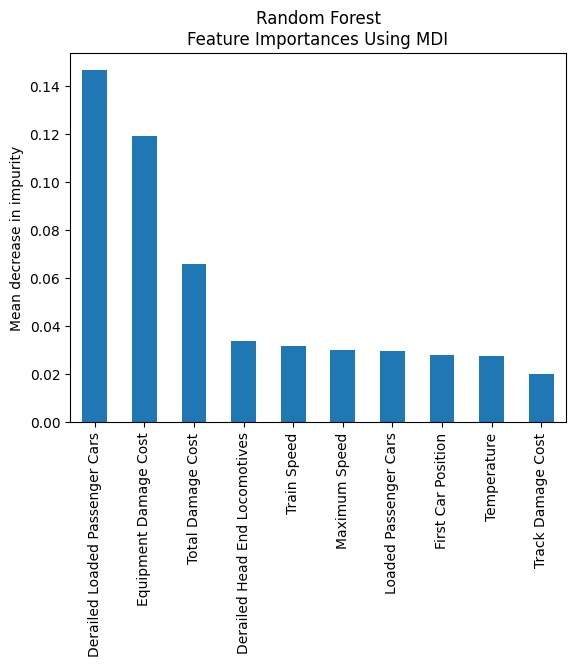

In [70]:
top_10_more_feat = forest_importances2.sort_values('importances',ascending=False).iloc[0:10,0]
std = forest_importances2.sort_values('importances',ascending=False).iloc[0:10,1]
fig, ax = plt.subplots()
top_10_more_feat.plot.bar(ax=ax)
ax.set_title("Random Forest\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


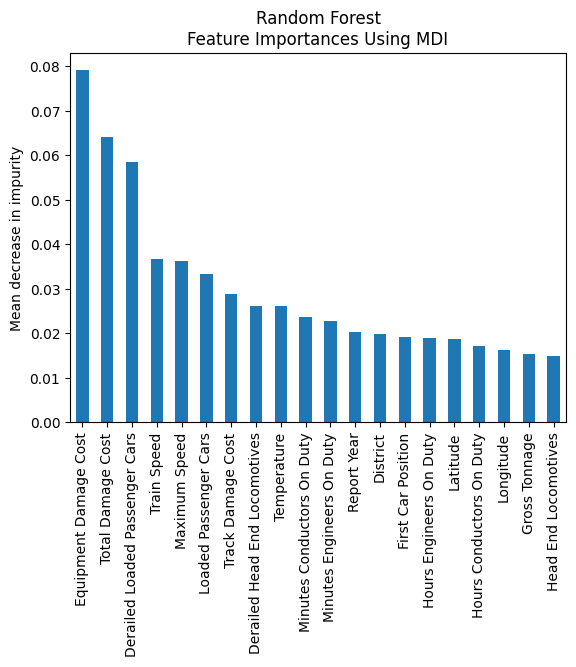

In [ ]:
top_20_more_feat = forest_importances.sort_values('importances',ascending=False).iloc[0:20,0]
std2 = forest_importances.sort_values('importances',ascending=False).iloc[0:20,1]
fig, ax = plt.subplots()
top_20_more_feat.plot.bar(ax=ax)
ax.set_title("Random Forest\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()
plt.savefig("images/rfreg-feature-importances.png")

#### Looking at different hyperparameters

##### max_features = sqrt

In [72]:
from sklearn.metrics import mean_squared_error

estimators = np.array([10,20,30,40,50,75,100,150,200,250,300])
train_error = np.array([])
train_score = np.array([])
test_error = np.array([])
test_score = np.array([])

for i in estimators:
    rfreg2 = RandomForestRegressor(max_features='sqrt',
                                   n_estimators=i,
                                   verbose=False,
                                   random_state=0)
    rfreg2.fit(xtrain,ytrain)
    train_score = np.append(train_score,rfreg2.score(xtrain,ytrain))
    test_score = np.append(test_score,rfreg2.score(xtest,ytest))
    train_error = np.append(train_error,mean_squared_error(ytrain,rfreg2.predict(xtrain)))
    test_error = np.append(test_error,mean_squared_error(ytest,rfreg2.predict(xtest)))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "panda

In [73]:
error_data = pd.DataFrame({'n_estimators':estimators, 'train error':train_error, 'test error':test_error})
score_data = pd.DataFrame({'n_estimators':estimators, 'train score':train_score, 'test score':test_score})

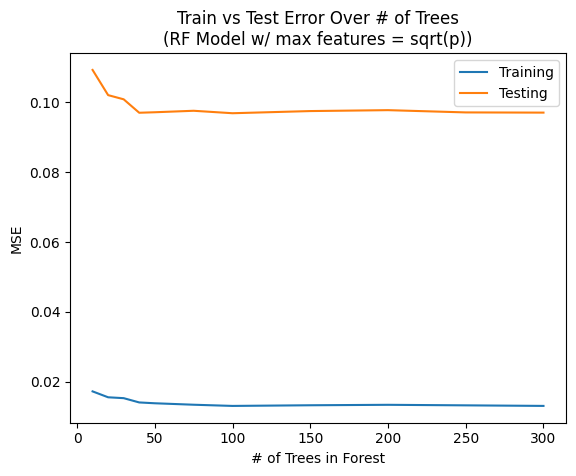

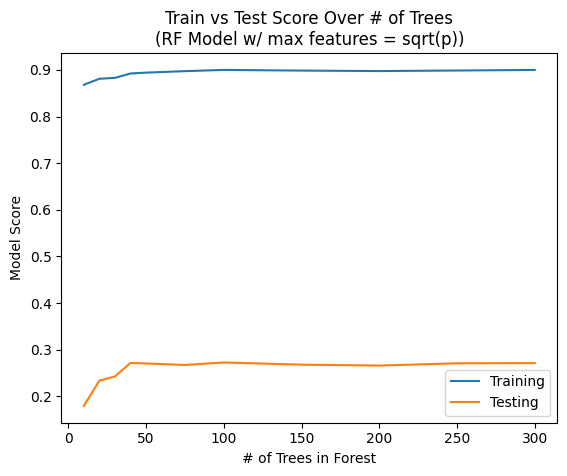

In [84]:
plt.plot(error_data['n_estimators'],error_data['train error'], label="Training")
plt.plot(error_data['n_estimators'],error_data['test error'], label="Testing")
plt.xlabel("# of Trees in Forest")
plt.ylabel("MSE")
plt.title("Train vs Test Error Over # of Trees\n(RF Model w/ max features = sqrt(p))")
plt.legend()
plt.savefig("images/rf-sqrt-forestsize-error.png")
plt.show()

plt.plot('n_estimators','train score',data=score_data, label="Training")
plt.plot('n_estimators','test score',data=score_data, label="Testing")
plt.xlabel("# of Trees in Forest")
plt.ylabel("Model Score")
plt.title("Train vs Test Score Over # of Trees\n(RF Model w/ max features = sqrt(p))")
plt.legend()
plt.savefig("images/rf-sqrt-forestsize-score.png")
plt.show()

In [75]:
test_size = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9])
train_error2 = np.array([])
train_score2 = np.array([])
test_error2 = np.array([])
test_score2 = np.array([])

for i in test_size:
    xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X,y, test_size=i)
    rfreg3 = RandomForestRegressor(max_features='sqrt',
                                   verbose=False,
                                   random_state=0)

    rfreg3.fit(xtrain2,ytrain2)
    train_score2 = np.append(train_score2,rfreg3.score(xtrain2,ytrain2))
    test_score2 = np.append(test_score2,rfreg3.score(xtest2,ytest2))
    train_error2 = np.append(train_error2,mean_squared_error(ytrain2,rfreg3.predict(xtrain2)))
    test_error2 = np.append(test_error2,mean_squared_error(ytest2,rfreg3.predict(xtest2)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "panda

In [76]:
error_data2 = pd.DataFrame({'test size':test_size, 'train error':train_error2, 'test error':test_error2})
score_data2 = pd.DataFrame({'test size':test_size, 'train score':train_score2, 'test score':test_score2})

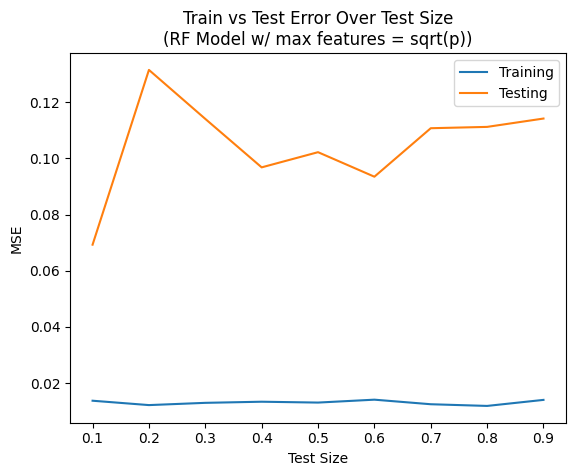

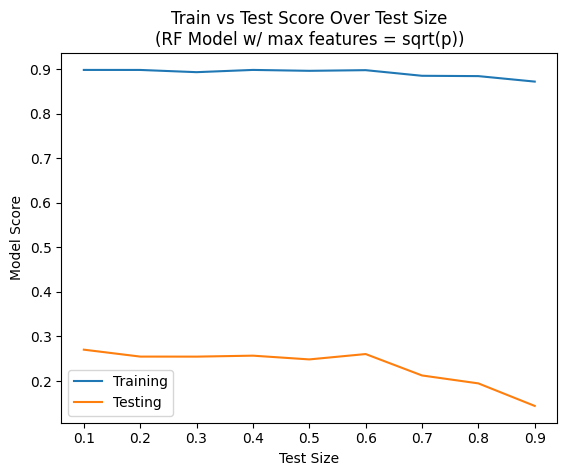

In [85]:
plt.plot(error_data2['test size'],error_data2['train error'], label="Training")
plt.plot(error_data2['test size'],error_data2['test error'], label="Testing")
plt.xlabel("Test Size")
plt.ylabel("MSE")
plt.title("Train vs Test Error Over Test Size\n(RF Model w/ max features = sqrt(p))")
plt.legend()
plt.savefig("images/rf-sqrt-testsize-error.png")
plt.show()

plt.plot('test size','train score',data=score_data2, label="Training")
plt.plot('test size','test score',data=score_data2, label="Testing")
plt.xlabel("Test Size")
plt.ylabel("Model Score")
plt.title("Train vs Test Score Over Test Size\n(RF Model w/ max features = sqrt(p))")
plt.legend()
plt.savefig("images/rf-sqrt-testsize-score.png")
plt.show()

##### Using max_features = # of predictors/2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "panda

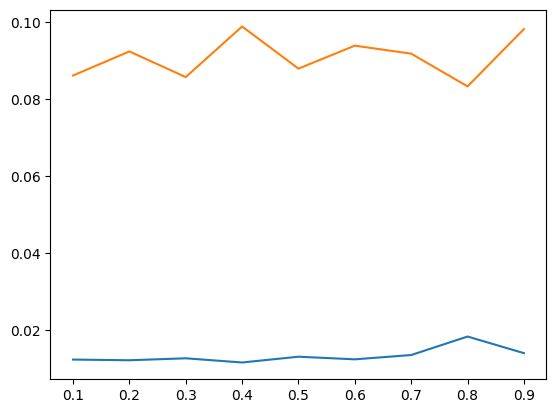

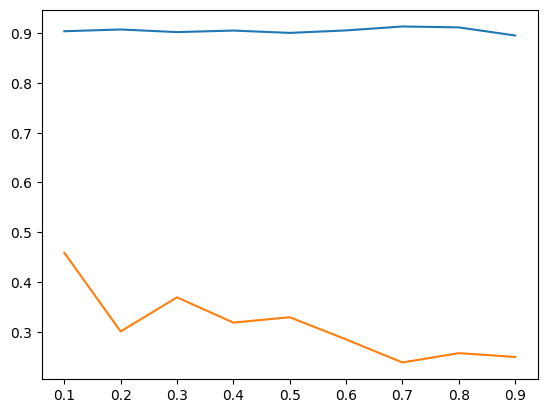

In [37]:
test_size = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9])
train_error2 = np.array([])
train_score2 = np.array([])
test_error2 = np.array([])
test_score2 = np.array([])

for i in test_size:
    xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X,y, test_size=i)
    rfreg3 = RandomForestRegressor(max_features=int(len(X.columns)/2),
                                   verbose=False,
                                   random_state=0)

    rfreg3.fit(xtrain2,ytrain2)
    train_score2 = np.append(train_score2,rfreg3.score(xtrain2,ytrain2))
    test_score2 = np.append(test_score2,rfreg3.score(xtest2,ytest2))
    train_error2 = np.append(train_error2,mean_squared_error(ytrain2,rfreg3.predict(xtrain2)))
    test_error2 = np.append(test_error2,mean_squared_error(ytest2,rfreg3.predict(xtest2)))
    
error_data2 = pd.DataFrame({'test size':test_size, 'train error':train_error2, 'test error':test_error2})
score_data2 = pd.DataFrame({'test size':test_size, 'train score':train_score2, 'test score':test_score2})



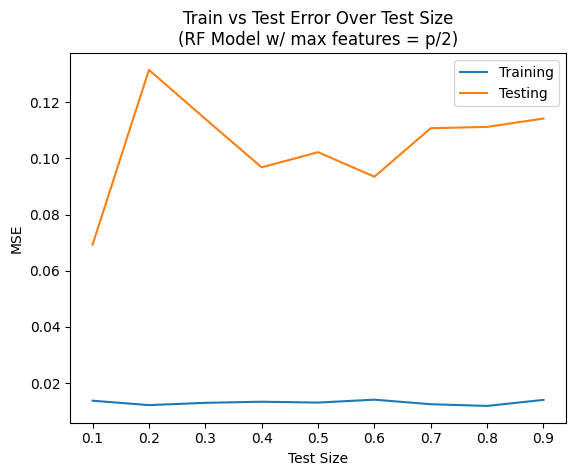

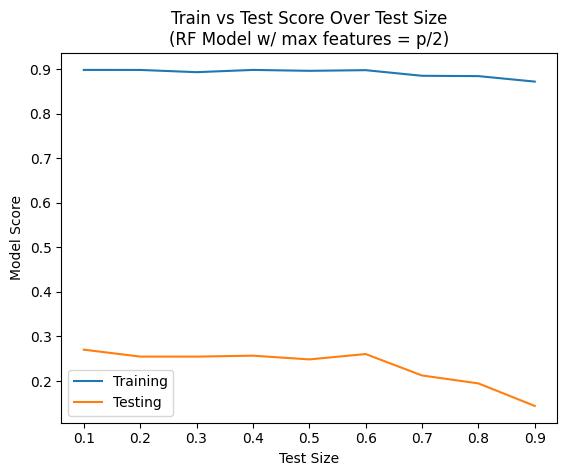

In [87]:
plt.plot(error_data2['test size'],error_data2['train error'], label="Training")
plt.plot(error_data2['test size'],error_data2['test error'], label="Testing")
plt.xlabel("Test Size")
plt.ylabel("MSE")
plt.title("Train vs Test Error Over Test Size\n(RF Model w/ max features = p/2)")
plt.legend()
plt.savefig("images/rf-halfpred-testsize-error.png")
plt.show()

plt.plot('test size','train score',data=score_data2, label="Training")
plt.plot('test size','test score',data=score_data2, label="Testing")
plt.xlabel("Test Size")
plt.ylabel("Model Score")
plt.title("Train vs Test Score Over Test Size\n(RF Model w/ max features = p/2)")
plt.legend()
plt.savefig("images/rf-halfpred-testsize-score.png")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "panda

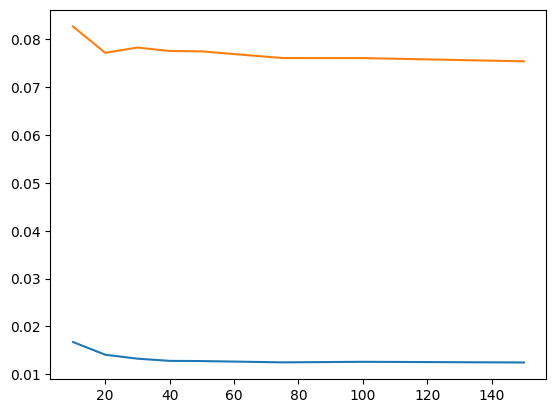

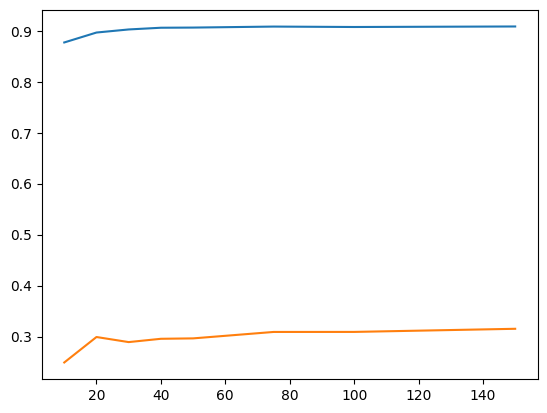

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)

estimators = np.array([10,20,30,40,50,75,100,150])
train_error = np.array([])
train_score = np.array([])
test_error = np.array([])
test_score = np.array([])

for i in estimators:
    rfreg2 = RandomForestRegressor(max_features=int(len(X.columns)/2),
                                   n_estimators=i,
                                   verbose=False,
                                   random_state=0)

    rfreg2.fit(xtrain,ytrain)
    train_score = np.append(train_score,rfreg2.score(xtrain,ytrain))
    test_score = np.append(test_score,rfreg2.score(xtest,ytest))
    train_error = np.append(train_error,mean_squared_error(ytrain,rfreg2.predict(xtrain)))
    test_error = np.append(test_error,mean_squared_error(ytest,rfreg2.predict(xtest)))
    
error_data = pd.DataFrame({'n_estimators':estimators, 'train error':train_error, 'test error':test_error})
score_data = pd.DataFrame({'n_estimators':estimators, 'train score':train_score, 'test score':test_score})



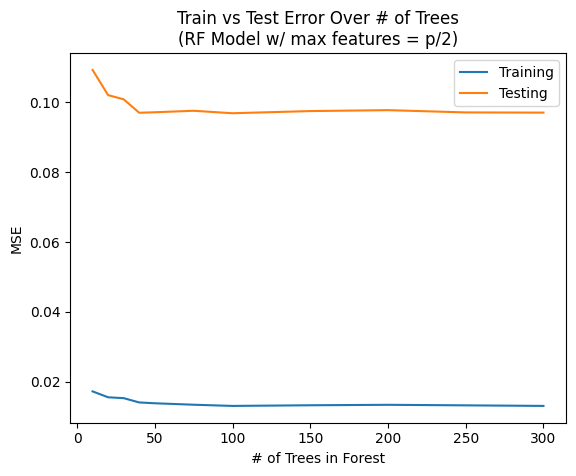

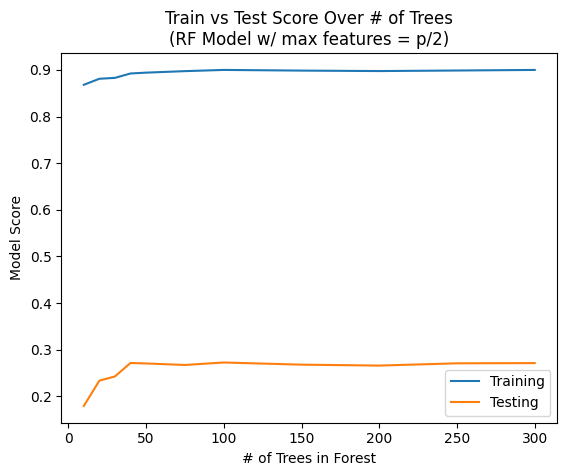

In [88]:
plt.plot(error_data['n_estimators'],error_data['train error'], label="Training")
plt.plot(error_data['n_estimators'],error_data['test error'], label="Testing")
plt.xlabel("# of Trees in Forest")
plt.ylabel("MSE")
plt.title("Train vs Test Error Over # of Trees\n(RF Model w/ max features = p/2)")
plt.legend()
plt.savefig("images/rf-halfpred-forestsize-error.png")
plt.show()

plt.plot('n_estimators','train score',data=score_data, label="Training")
plt.plot('n_estimators','test score',data=score_data, label="Testing")
plt.xlabel("# of Trees in Forest")
plt.ylabel("Model Score")
plt.title("Train vs Test Score Over # of Trees\n(RF Model w/ max features = p/2)")
plt.legend()
plt.savefig("images/rf-halfpred-forestsize-score.png")
plt.show()

#### RF Classifer

In [168]:
bins = [-1,1,3,6,10,np.inf]
bin_names = ['0','1-3','3-6','6-10','10+']
initial = initial_dat
initial['injuries']=initial.loc[:,'Railroad Employees Injured'].astype(int)
initial['injuries']=pd.cut(initial['injuries'].array,bins,labels=bin_names)
initial = initial.drop('Railroad Employees Injured', axis=1)

In [173]:
from sklearn.preprocessing import OrdinalEncoder

cat_features = initial[initial['Year']>1999].loc[:,['Reporting Railroad Name',
                                                        'Accident Type',
                                                        'Equipment Type',
                                                        'Equipment Attended',
                                                        'Method of Operation',
                                                        'Passengers Transported',
                                                        'Primary Accident Cause Code',
                                                        'Accident Cause Code',
                                                        'injuries']]



num_features = df[df['Report Year']>1999].select_dtypes(include=['float64', 'int64'])
num_features.drop(num_features[num_features['Report Year'] == 2003].index, inplace = True)
num_features = num_features.drop(['Accident Year',
                   'Accident Month',
                   'Other Accident Year',
                   'Other Accident Month',
                   'Day',
                   'Maintenance Accident Year',
                   'Maintenance Accident Month',
                   'Railroad Employees Killed',
                   'Railroad Employees Injured',
                   'Passengers Killed',
                   'Passengers Injured',
                   'Others Killed',
                   'Others Injured',
                   'Total Persons Killed',
                   'Total Persons Injured',
                   'Total Killed Form 54',
                   'Total Injured Form 54',
                   'Persons Killed For Reporting Railroad',
                   'Persons Injured For Reporting Railroad'], axis=1)

ohe_encoder = OneHotEncoder()
ohe = ohe_encoder.fit_transform(cat_features)
#encoder.get_feature_names_out()
num_imputer = SimpleImputer(strategy='mean')
imp = num_imputer.fit_transform(num_features)
#imputer.feature_names_in_
oe_encoder = OrdinalEncoder()
oe = oe_encoder.fit_transform(cat_features)


#cat = pd.DataFrame.sparse.from_spmatrix(ohe, columns=ohe_encoder.get_feature_names_out())
num = pd.DataFrame(imp, columns=num_imputer.feature_names_in_)
cat = pd.DataFrame(oe, columns=oe_encoder.feature_names_in_)

In [178]:
model_dat = pd.concat([num,cat],axis=1)

model_dat.fillna(0, inplace=True)

X = model_dat.drop('injuries',axis=1)
y = model_dat['injuries']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf_class = RandomForestClassifier(max_features='sqrt',
                                  oob_score=True,
                                  verbose=True,
                                  n_jobs=-1,
                                  random_state=0)


In [179]:

rf_class.fit(xtrain,ytrain)
print("score:",rf_class.score(xtest,ytest))
conf_mat = confusion_matrix(ytest,rf_class.predict(xtest))

# turn conf matrix in df for visualization
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

conf_matrix_to_df(conf_mat,initial.injuries.unique())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


score: 0.9906897065395501


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


,0,1-3,3-6,10+,6-10
0,13287,8,0,0,0
1-3,104,13,0,0,0
3-6,1,0,0,1,0
10+,7,1,0,1,0
6-10,3,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


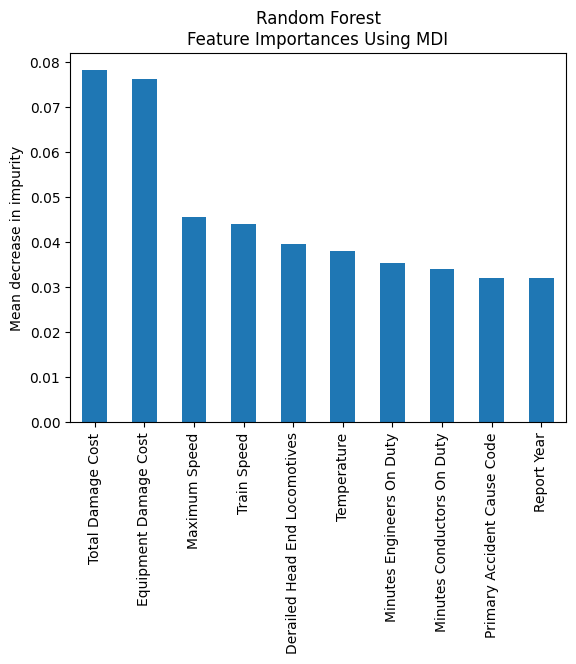

In [180]:
importances = rf_class.feature_importances_
colnames = X.columns

std = np.std([tree.feature_importances_ for tree in rf_class.estimators_], axis=0)
forest_importances = pd.DataFrame({'importances':importances,'std':std}, index=colnames)
forest_importances.sort_values('importances',ascending=False)

top_10 = forest_importances.sort_values('importances',ascending=False).iloc[0:10,0]
std = forest_importances.sort_values('importances',ascending=False).iloc[0:10,1]
fig, ax = plt.subplots()
top_10.plot.bar(ax=ax)
ax.set_title("Random Forest\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

##### Above 0 Injuries (All Years)

In [181]:
from sklearn.preprocessing import OrdinalEncoder

cat_features = initial.loc[:,['Reporting Railroad Name',
                                                        'Accident Type',
                                                        'Equipment Type',
                                                        'Equipment Attended',
                                                        'Method of Operation',
                                                        'Passengers Transported',
                                                        'Primary Accident Cause Code',
                                                        'Accident Cause Code',
                                                        'injuries']]



num_features = df.select_dtypes(include=['float64', 'int64'])
num_features.drop(num_features[num_features['Report Year'] == 2003].index, inplace = True)
num_features = num_features.drop(['Accident Year',
                   'Accident Month',
                   'Other Accident Year',
                   'Other Accident Month',
                   'Day',
                   'Maintenance Accident Year',
                   'Maintenance Accident Month',
                   'Railroad Employees Killed',
                   'Railroad Employees Injured',
                   'Passengers Killed',
                   'Passengers Injured',
                   'Others Killed',
                   'Others Injured',
                   'Total Persons Killed',
                   'Total Persons Injured',
                   'Total Killed Form 54',
                   'Total Injured Form 54',
                   'Persons Killed For Reporting Railroad',
                   'Persons Injured For Reporting Railroad'], axis=1)

ohe_encoder = OneHotEncoder()
ohe = ohe_encoder.fit_transform(cat_features)
#encoder.get_feature_names_out()
num_imputer = SimpleImputer(strategy='mean')
imp = num_imputer.fit_transform(num_features)
#imputer.feature_names_in_
oe_encoder = OrdinalEncoder()
oe = oe_encoder.fit_transform(cat_features)


#cat = pd.DataFrame.sparse.from_spmatrix(ohe, columns=ohe_encoder.get_feature_names_out())
num = pd.DataFrame(imp, columns=num_imputer.feature_names_in_)
cat = pd.DataFrame(oe, columns=oe_encoder.feature_names_in_)

model_dat = pd.concat([num,cat],axis=1)
model_dat.fillna(0, inplace=True)
model_dat = model_dat[model_dat['injuries']!='0']

X = model_dat.drop('injuries',axis=1)
y = model_dat['injuries']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [182]:
rf_class.fit(xtrain,ytrain)
print("score:",rf_class.score(xtest,ytest))
conf_mat = confusion_matrix(ytest,rf_class.predict(xtest))

# turn conf matrix in df for visualization
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

conf_matrix_to_df(conf_mat,initial.injuries.unique())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


score: 0.986634923628135


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


,0,1-3,3-6,10+,6-10
0,41857,0,0,0,0
1-3,481,0,0,0,0
3-6,12,0,0,0,0
10+,58,0,0,0,0
6-10,16,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


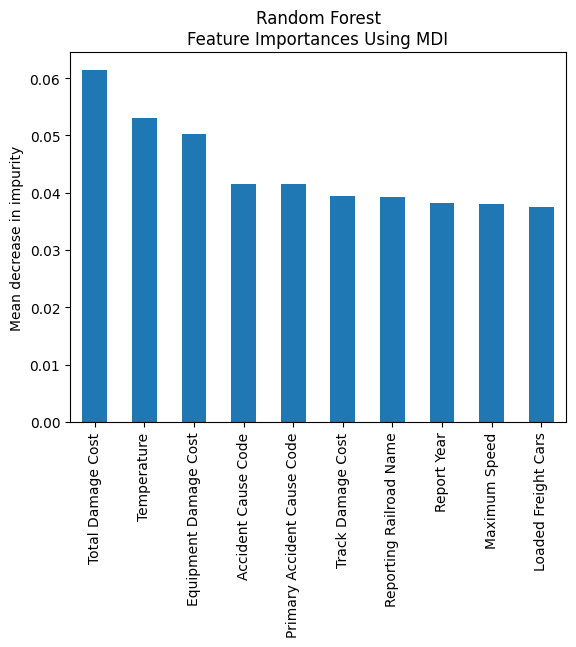

In [183]:
importances = rf_class.feature_importances_
colnames = X.columns

std = np.std([tree.feature_importances_ for tree in rf_class.estimators_], axis=0)
forest_importances = pd.DataFrame({'importances':importances,'std':std}, index=colnames)
forest_importances.sort_values('importances',ascending=False)

top_10 = forest_importances.sort_values('importances',ascending=False).iloc[0:10,0]
std = forest_importances.sort_values('importances',ascending=False).iloc[0:10,1]
fig, ax = plt.subplots()
top_10.plot.bar(ax=ax)
ax.set_title("Random Forest\nFeature Importances Using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()